In [35]:
import pandas as pd
import spacy

In [37]:
nlp = spacy.load("en_core_web_sm")

In [2]:
df_doi = pd.read_csv('../assets/train_test_dois.tsv',sep='\t')

In [4]:
df_metadata = pd.read_csv('../notebooks/metadata_clustered.csv')

/tmp/ipykernel_17695/3131118706.py:1: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata = pd.read_csv('../notebooks/metadata_clustered.csv')


In [5]:
df = pd.merge(left=df_doi, right=df_metadata, on='doi', how='left')

In [44]:
df['clean'] = df.abstract.fillna('').apply(lambda text: 
        " ".join(token.lemma_ for token in nlp(text)
                if token.lemma_.lower() not in nlp.Defaults.stop_words and token.is_alpha))

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [18]:
def createWordCountFigure(lemmatized_data,max_df_thr):
    cv=CountVectorizer(analyzer='word',max_features=1000,max_df=max_df_thr)
    data=cv.fit_transform(lemmatized_data)
    df_dtm_0 = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
    # Transposing document term matrix
    df_dtm_0 = df_dtm_0.transpose()
    #Create count vector
    df_dtm_0_count = df_dtm_0.sum(axis=1, skipna=True)
    df_dtm_0_count = df_dtm_0_count.to_frame().rename(columns={0:'count'})
    ## dict required for WC
    dict_dtm_0 = df_dtm_0_count.to_dict()['count']
    #print(dict_dtm_0)
    wc = WordCloud(width=1600, height=1200, max_words=150, colormap='Dark2').generate_from_frequencies(dict_dtm_0)
    return wc


def showWordCountPic(picture):
    plt.figure(figsize=(16,8))
    plt.imshow(picture, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [51]:
pic_wordcloud = createWordCountFigure(df.clean.fillna(''), 0.99)

/home/frinve/Code/CovEffect-data-provision/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


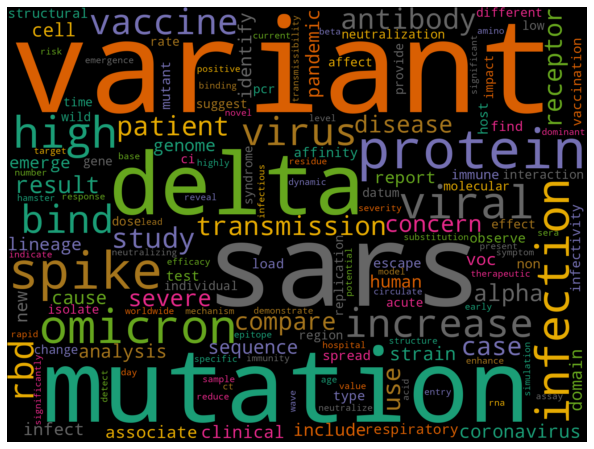

In [52]:
showWordCountPic(pic_wordcloud)